# Analysis of 2022 masks

## plot corrected positions vs real source positions on sky

In [ ]:
cd ../..

/home/dvibert/work/FireBallPipe.git


In [2]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
import datetime 
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## F3 mask

In [3]:
G2UV = Guider2UV(filename='Notebook/2018/data_needed_to_run_notebooks/F3_180826_2.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.42402654, 36.43499699)>): (lon, lat) in deg
    [(0.17979887, -0.02325374)]>
FOV center pixel position in guider [array([1347.26210746]), array([450.73438835])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (352.3424, 0.21245)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.42402654, 36.43499699)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.424026537  36.4349969891  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024648264068189  0.00024664057706659  
NAXIS : 0  0

    mask_rotation: 44.2677914054

In [9]:
#target_filename = 'Calibration/Targets/targets_F3.txt'
target_filename = 'Calibration/Targets/2022/targets_F3.csv'
F3 = Table.read(target_filename, format='ascii')

In [5]:
F3['RA'].name='ra'
F3['DEC'].name='dec'

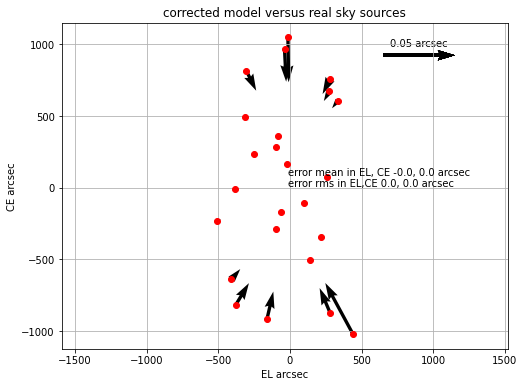

In [6]:
G2UV.FieldP.gamma = 1.
slit_coords_all, source_coords_all = G2UV.compare_mask_2_sky(F3['Internal-count'], F3, scale=1/10000., quiverscale=.05)

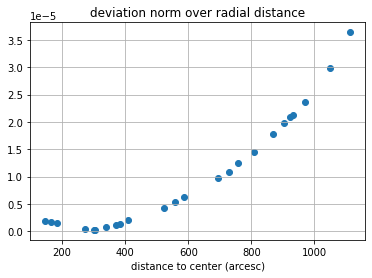

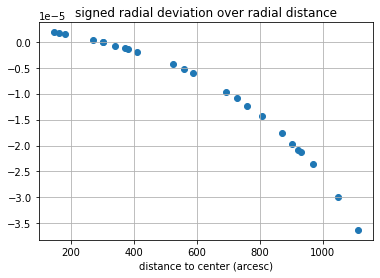

In [8]:
origin = slit_coords_all[0].origin
radius = []
delta = np.zeros((len(slit_coords_all),2))
delta_norm = []
delta_dot_radius = []

for i,(s,g) in enumerate(zip(slit_coords_all, source_coords_all)):
    r = np.sqrt( g.lon*g.lon + g.lat*g.lat).to(u.arcsec).value
    radius.append(r) 
    delta[i] = np.array([(s.lon-g.lon).to(u.arcsec).value, (s.lat-g.lat).to(u.arcsec).value])
    delta_norm.append(np.sqrt(np.square(delta[i]).sum()))
    delta_dot_radius.append( ((s.lon-g.lon).to(u.arcsec).value * g.lon.to(u.arcsec).value +
                             (s.lat-g.lat).to(u.arcsec).value * g.lat.to(u.arcsec).value ) / r)
    
plt.figure()
plt.scatter(radius, np.array(delta_norm)/np.array(radius))
plt.xlabel('distance to center (arcesc)')
plt.title('deviation norm over radial distance')
plt.grid(True)
#plt.ylim((0.005,0.015))

plt.figure()
plt.scatter(radius, np.array(delta_dot_radius)/np.array(radius))
plt.xlabel('distance to center (arcesc)')
plt.title('signed radial deviation over radial distance')
plt.grid(True)
#plt.ylim((0.005,0.015))

## F2 mask

In [11]:
G2UV = Guider2UV(filename='Notebook/2018/data_needed_to_run_notebooks/F2_180901.pkl')
print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39837843, 36.42897653)>): (lon, lat) in deg
    [(0.18496501, -0.02412983)]>
FOV center pixel position in guider [array([1366.06657564]), array([431.55331128])]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-20.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (253.0624, 34.9699)>)>
    gamma: 0.9970115643897801

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39837843, 36.42897653)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.39837843  36.4289765325  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024600287745946  0.00024580474694405  
NAXIS : 0  0

    mask_rotation:

In [12]:
#target_filename = 'Calibration/Targets/targets_F3.txt'
target_filename = 'Calibration/Targets/2022/targets_F2.csv'
F2 = Table.read(target_filename, format='ascii')

In [13]:
F2['RA'].name='ra'
F2['DEC'].name='dec'

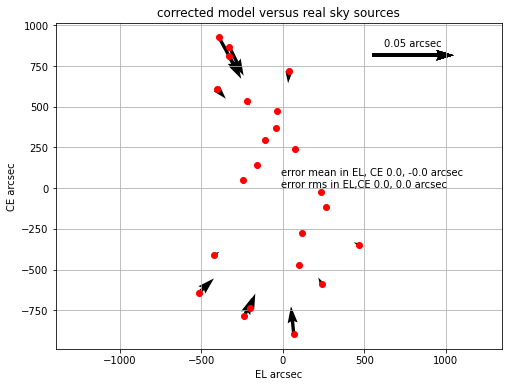

In [14]:
G2UV.FieldP.gamma = 1.
slit_coords_all, source_coords_all = G2UV.compare_mask_2_sky(F2['Internal-count'], F2, scale=1/10000., quiverscale=.05)

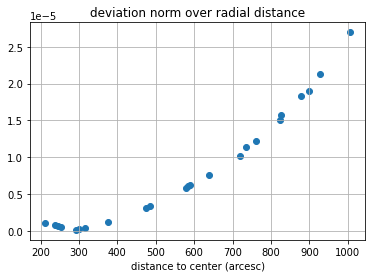

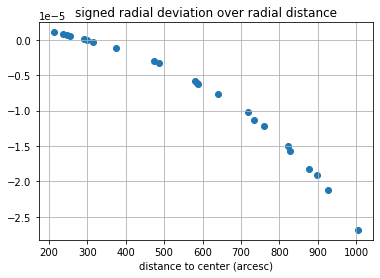

In [15]:
origin = slit_coords_all[0].origin
radius = []
delta = np.zeros((len(slit_coords_all),2))
delta_norm = []
delta_dot_radius = []

for i,(s,g) in enumerate(zip(slit_coords_all, source_coords_all)):
    r = np.sqrt( g.lon*g.lon + g.lat*g.lat).to(u.arcsec).value
    radius.append(r) 
    delta[i] = np.array([(s.lon-g.lon).to(u.arcsec).value, (s.lat-g.lat).to(u.arcsec).value])
    delta_norm.append(np.sqrt(np.square(delta[i]).sum()))
    delta_dot_radius.append( ((s.lon-g.lon).to(u.arcsec).value * g.lon.to(u.arcsec).value +
                             (s.lat-g.lat).to(u.arcsec).value * g.lat.to(u.arcsec).value ) / r)
    
plt.figure()
plt.scatter(radius, np.array(delta_norm)/np.array(radius))
plt.xlabel('distance to center (arcesc)')
plt.title('deviation norm over radial distance')
plt.grid(True)
#plt.ylim((0.005,0.015))

plt.figure()
plt.scatter(radius, np.array(delta_dot_radius)/np.array(radius))
plt.xlabel('distance to center (arcesc)')
plt.title('signed radial deviation over radial distance')
plt.grid(True)
#plt.ylim((0.005,0.015))